# Problem Description

This notebook will guide you through implementation of **multivariate linear regression** to solve the **polynomial regression** problem:

$$
f(x;\boldsymbol{\rm w}) = w_0 + w_1 x + w_2 x^2 +  w_3 x^3 + w_4 x^4
= {\boldsymbol{\rm x}}^T{\boldsymbol{\rm w}}
$$

$$
\boldsymbol{\rm w} = \begin{bmatrix}w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4\end{bmatrix}, 
\qquad
\boldsymbol{\rm x} = \begin{bmatrix}1 \\ x \\ x^2 \\ x^3 \\ x^4\end{bmatrix}
$$

Below, you will

1. Implement the cost function for multivarate linear regression
1. Implement the normal equations method (closed-form solution discussed in class) to solve a multivariate linear regression problem
1. Implement gradient descent for multivariate linear regression


## Imports
Run this code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Helper functions
Run this code to set up the helper functions. The function ``feature_expansion`` accepts an vector of $n$ scalar x values and returns an $n \times 5$ data matrix (i.e., the design matrix discussed in class) by applying the feature expansion $x \mapsto [1, x, x^2, x^3, x^4]$ for each scalar $x$ value.

In [2]:
def feature_expansion(x, deg):
    if x.ndim > 1:
        raise ValueError('x should be a 1-dimensional array')
    m = x.shape
    x_powers = [x**k for k in range(0,deg+1)]
    X = np.stack( x_powers, axis=1 )

    return X

def plot_model(X_test, w):
    '''
    Note: uses globals x, y, x_test, which are assigned below
    when the dataset is created. Don't overwrite these variables.
    '''
    y_test = np.dot(X_test, w)
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
    plt.legend(['Test', 'Train'])

## List comprehensions (3 points) 

Read about list comprehensions. Explain what is happening in the line of code

```python
x_powers = [x**k for k in range(0,deg+1)]  
```

** *Your answer here* **

x_powers is the new list which contains x^k(x**k) values for each of k. The k value can be from 0 to deg+1.

Suppose deg = 3,so the values of k can be 0,1,2. Furthermore, for each k value, the new list x_powers will contain the following values: x**0,x**1,x**2 or 1,x**1,x**2. 

## Create a data set for polynomial regression

Read and run the code below. This generates data from a fourth-degree polynomial and then uses feature expansion to set up the problem of learning the polynomial as multivariate linear regression

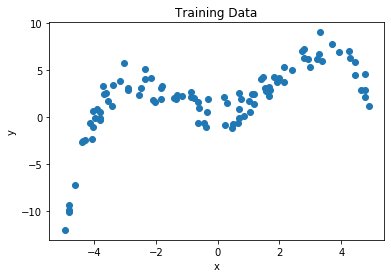

In [3]:
# Set random seed
np.random.seed(0)

# Create random set of m training x values between -5 and 5
m = 100
x = np.random.rand(m)*10 - 5   

# Create evenly spaced test x values (for plotting)
x_test  = np.linspace(-5, 5, 100)
m_test  = len(x_test);

# Feature expansion for training and test x values
deg = 4
X      = feature_expansion(x, deg)
X_test = feature_expansion(x_test, deg)

n = deg + 1   # total number of features including the '1' feature

# Define parameters (w) and generate y values
w = 0.1*np.array([1, 1, 10, 0.5, -0.5]);
y = np.dot(X, w) + np.random.randn(m)   # polynomial plus noise

# Plot the training data
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Implement the cost function (3 points) 
Complete the code below to implement the cost function for multivariate linear regression.

In [4]:
def cost_function(X, y, w):  
    '''
    Compute the cost function for a particular data set and 
    hypothesis (parameter vector)
    
    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        w   parameters (length n vector)
    Output:
        cost    the value of the cost function (scalar)
    '''                        
    cost = np.sum(np.square((X.dot(w) - y)))
    return cost
    

## Test the cost function
Run this to test your cost function.

In [5]:
np.random.seed(1)

w_random = np.random.rand(n)
w_zeros  = np.zeros(n)
w_ones   = np.ones(n)

print( "Cost function (random): %.2f" % cost_function(X, y, w_random))  # prints 109047.29
print( "Cost function  (zeros): %.2f" % cost_function(X, y, w_zeros))   # prints 1691.30
print( "Cost function   (ones): %.2f" % cost_function(X, y, w_ones))    # prints 5049362.16

Cost function (random): 109047.29
Cost function  (zeros): 1691.30
Cost function   (ones): 5049362.16


## Implement first training algorithm: normal equations (9 points) 

In [28]:
def normal_equations(X, y):
    '''
    Train a linear regression model using the normal equations

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
    Output:
        w   parameters (length n vector)

    '''
    # TODO: write correct code to find w using the normal equations
    m, n = X.shape
    w = np.zeros(n)            
    w= np.linalg.inv( X.transpose().dot(X)).dot(X.transpose()).dot(y)
    return w

## Use normal equations to fit the model
Run this code to test your implementation of the normal equations. If it runs properly you will see a curve that fits the data well. Note the value of the cost function for ``w_normal_equations``.

Cost function: 97.07


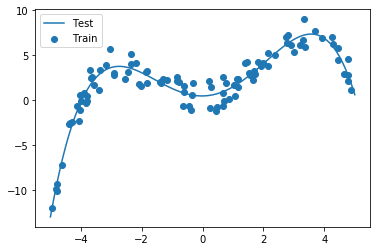

In [29]:
w_normal_equations = normal_equations(X, y)
plot_model(X_test, w_normal_equations)
print ("Cost function: %.2f" % cost_function(X, y, w_normal_equations))

## Implement second training algorithm: (vectorized) gradient descent (9 points) 

Implement gradient descent for multivariate linear regression. Make sure your solution is vectorized (Hints: check lecture slides).

In [52]:
def gradient_descent( X, y, alpha, iters, w=None ):
    '''
    Train a linear regression model by gradient descent

    Inputs: 
                r   c
        X       m x n data matrix
        y       training output (length m vector)
        alpha   step size
        iters   number of iterations
        w   initial parameter values (length n vector; optional)
    
    Output:
        w      learned parameters (length n vector)
        J_history  trace of cost function value in each iteration

    '''

    m,n = X.shape
    
    if w is None:
        w = np.zeros(n)    
    # For recording cost function value during gradient descent
    J_history = np.zeros(iters)  
    for i in range(0, iters):
        # TODO: compute gradient (vectorized) and update w
        difference = y - np.dot(X,w)
        gradient = -2*X.transpose().dot(difference)
        w -= alpha * gradient
        # Record cost function
        J_history[i] = cost_function(X, y, w)
 

    return w, J_history

## Use gradient descent to train the model (6 points) 
* Write code to call your ``gradient_descent`` method to learn parameter
* Plot the model fit (use ``plot_model``)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


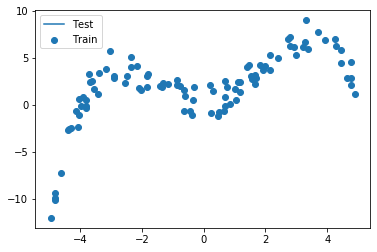

In [53]:
# TODO: write code
iters = 100
w, J_history = gradient_descent(X,y,0.001,iters)
plot_model(X_test, w)

* Plot the cost function vs. iteration to help assess convergence
* Print the final value of the cost function

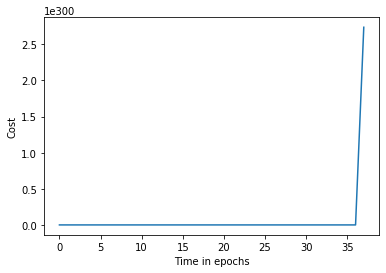

In [47]:
# TODO: write code
plt.figure()
plt.plot(range(0,iters),J_history)
plt.xlabel("Time in epochs")
plt.ylabel("Cost")
plt.show()

* Experiment with different step sizes and numbers of iterations until you can find a good model. Try to match the cost function value from ``normal_equations`` to two decimal places. How many iterations does this take? 

** *Write your answer here*. **